# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [2]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


### OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

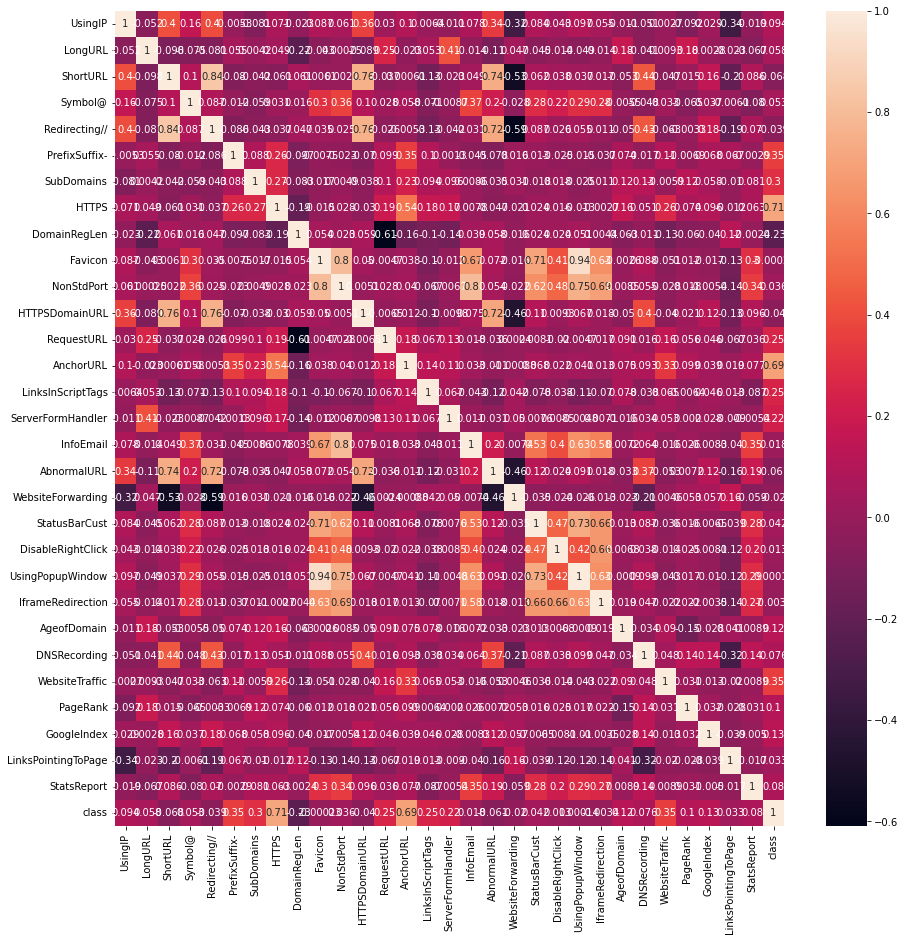

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

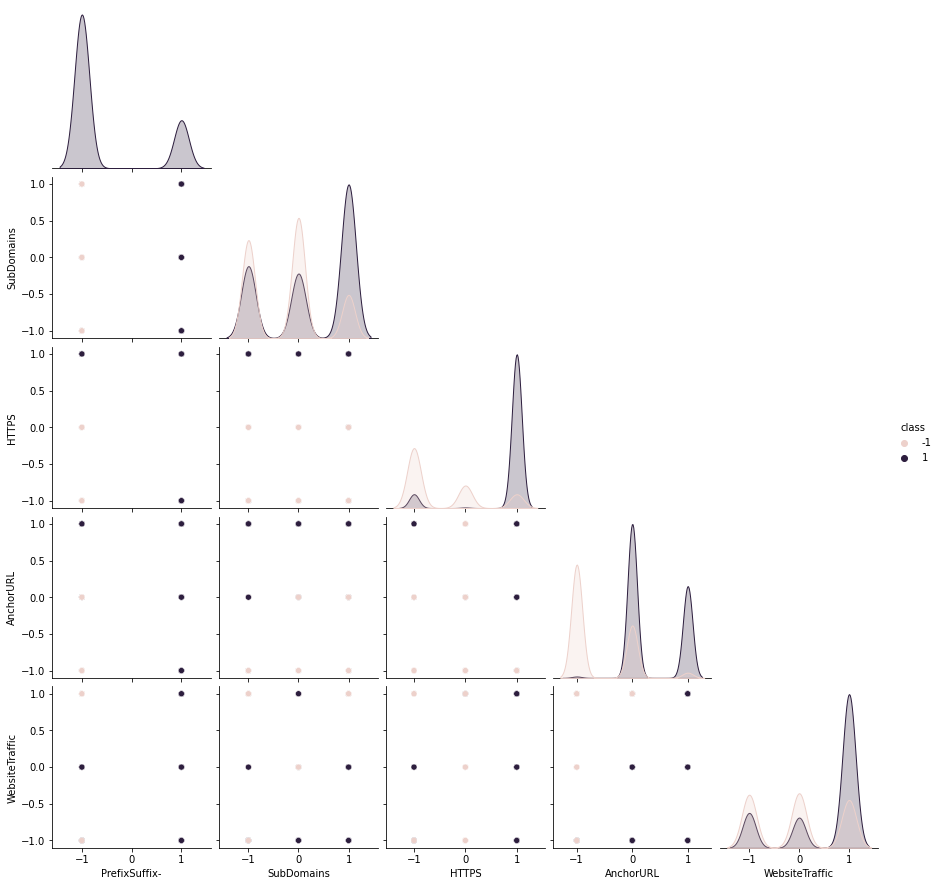

In [10]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


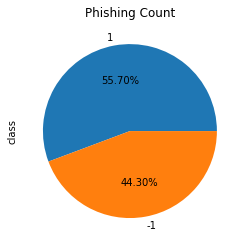

In [11]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [12]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [14]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [15]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [17]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [19]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [20]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [22]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [23]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



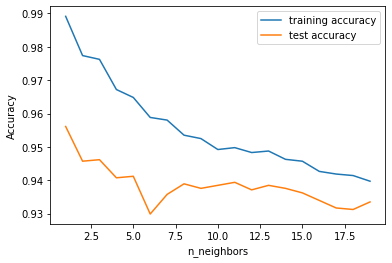

In [24]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [26]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [27]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [28]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [29]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [31]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [32]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [33]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [36]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [37]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.960

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.967


In [39]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



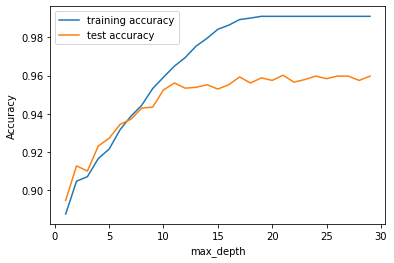

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [42]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [43]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [44]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.974

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.967


In [45]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



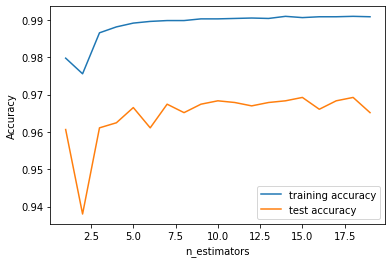

In [47]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [48]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [49]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [50]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [51]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [52]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



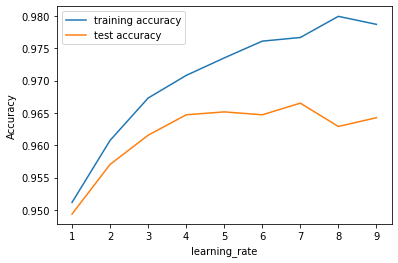

In [53]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

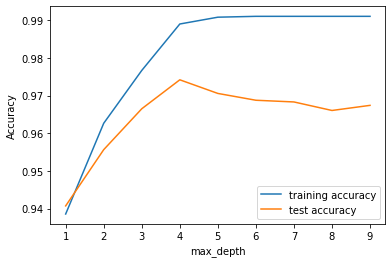

In [54]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [56]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 90.5ms	remaining: 1m 30s
1:	learn: 0.4349357	total: 97.8ms	remaining: 48.8s
2:	learn: 0.3609236	total: 104ms	remaining: 34.7s
3:	learn: 0.3050829	total: 111ms	remaining: 27.6s
4:	learn: 0.2766620	total: 117ms	remaining: 23.3s
5:	learn: 0.2475476	total: 124ms	remaining: 20.5s
6:	learn: 0.2286637	total: 129ms	remaining: 18.3s
7:	learn: 0.2138754	total: 133ms	remaining: 16.5s
8:	learn: 0.2013643	total: 138ms	remaining: 15.2s
9:	learn: 0.1896378	total: 143ms	remaining: 14.1s
10:	learn: 0.1819539	total: 148ms	remaining: 13.3s
11:	learn: 0.1767867	total: 153ms	remaining: 12.6s
12:	learn: 0.1727735	total: 158ms	remaining: 12s
13:	learn: 0.1682578	total: 164ms	remaining: 11.5s
14:	learn: 0.1641759	total: 169ms	remaining: 11.1s
15:	learn: 0.1614218	total: 174ms	remaining: 10.7s
16:	learn: 0.1558968	total: 179ms	remaining: 10.4s
17:	learn: 0.1535881	total: 184ms	remaining: 10.1s
18:	learn: 0.1514228	total: 189ms	remaining: 9.77s
19:	learn: 0.1482580	total: 194ms	remain

180:	learn: 0.0526404	total: 1.16s	remaining: 5.26s
181:	learn: 0.0525145	total: 1.17s	remaining: 5.25s
182:	learn: 0.0524332	total: 1.17s	remaining: 5.25s
183:	learn: 0.0522311	total: 1.18s	remaining: 5.24s
184:	learn: 0.0519353	total: 1.19s	remaining: 5.24s
185:	learn: 0.0515714	total: 1.19s	remaining: 5.22s
186:	learn: 0.0514909	total: 1.2s	remaining: 5.21s
187:	learn: 0.0513162	total: 1.2s	remaining: 5.2s
188:	learn: 0.0511884	total: 1.21s	remaining: 5.19s
189:	learn: 0.0510652	total: 1.21s	remaining: 5.18s
190:	learn: 0.0509786	total: 1.22s	remaining: 5.17s
191:	learn: 0.0508893	total: 1.22s	remaining: 5.15s
192:	learn: 0.0505900	total: 1.23s	remaining: 5.14s
193:	learn: 0.0504426	total: 1.24s	remaining: 5.13s
194:	learn: 0.0502767	total: 1.24s	remaining: 5.12s
195:	learn: 0.0500644	total: 1.25s	remaining: 5.11s
196:	learn: 0.0499431	total: 1.25s	remaining: 5.1s
197:	learn: 0.0498418	total: 1.25s	remaining: 5.08s
198:	learn: 0.0497734	total: 1.26s	remaining: 5.07s
199:	learn: 0.04

362:	learn: 0.0340802	total: 2.25s	remaining: 3.94s
363:	learn: 0.0340117	total: 2.25s	remaining: 3.93s
364:	learn: 0.0339431	total: 2.26s	remaining: 3.93s
365:	learn: 0.0338809	total: 2.26s	remaining: 3.92s
366:	learn: 0.0338159	total: 2.27s	remaining: 3.91s
367:	learn: 0.0337862	total: 2.27s	remaining: 3.91s
368:	learn: 0.0337620	total: 2.28s	remaining: 3.9s
369:	learn: 0.0337018	total: 2.28s	remaining: 3.89s
370:	learn: 0.0336391	total: 2.29s	remaining: 3.88s
371:	learn: 0.0335537	total: 2.29s	remaining: 3.87s
372:	learn: 0.0335024	total: 2.3s	remaining: 3.87s
373:	learn: 0.0334719	total: 2.31s	remaining: 3.86s
374:	learn: 0.0334368	total: 2.31s	remaining: 3.85s
375:	learn: 0.0333678	total: 2.31s	remaining: 3.84s
376:	learn: 0.0333293	total: 2.32s	remaining: 3.83s
377:	learn: 0.0332929	total: 2.33s	remaining: 3.83s
378:	learn: 0.0332465	total: 2.33s	remaining: 3.82s
379:	learn: 0.0331731	total: 2.34s	remaining: 3.81s
380:	learn: 0.0331123	total: 2.34s	remaining: 3.81s
381:	learn: 0.

549:	learn: 0.0274373	total: 3.32s	remaining: 2.72s
550:	learn: 0.0274372	total: 3.33s	remaining: 2.71s
551:	learn: 0.0274062	total: 3.34s	remaining: 2.71s
552:	learn: 0.0273534	total: 3.34s	remaining: 2.7s
553:	learn: 0.0273206	total: 3.35s	remaining: 2.7s
554:	learn: 0.0273206	total: 3.35s	remaining: 2.69s
555:	learn: 0.0272855	total: 3.36s	remaining: 2.68s
556:	learn: 0.0272855	total: 3.37s	remaining: 2.68s
557:	learn: 0.0272748	total: 3.37s	remaining: 2.67s
558:	learn: 0.0272470	total: 3.38s	remaining: 2.67s
559:	learn: 0.0272083	total: 3.38s	remaining: 2.66s
560:	learn: 0.0271917	total: 3.39s	remaining: 2.65s
561:	learn: 0.0271917	total: 3.4s	remaining: 2.65s
562:	learn: 0.0271917	total: 3.4s	remaining: 2.64s
563:	learn: 0.0271917	total: 3.41s	remaining: 2.63s
564:	learn: 0.0271842	total: 3.41s	remaining: 2.63s
565:	learn: 0.0271671	total: 3.42s	remaining: 2.62s
566:	learn: 0.0271555	total: 3.42s	remaining: 2.61s
567:	learn: 0.0271357	total: 3.43s	remaining: 2.61s
568:	learn: 0.02

713:	learn: 0.0253414	total: 4.22s	remaining: 1.69s
714:	learn: 0.0253414	total: 4.23s	remaining: 1.69s
715:	learn: 0.0253414	total: 4.24s	remaining: 1.68s
716:	learn: 0.0253414	total: 4.24s	remaining: 1.67s
717:	learn: 0.0253413	total: 4.25s	remaining: 1.67s
718:	learn: 0.0253413	total: 4.26s	remaining: 1.66s
719:	learn: 0.0253413	total: 4.26s	remaining: 1.66s
720:	learn: 0.0253413	total: 4.27s	remaining: 1.65s
721:	learn: 0.0253299	total: 4.28s	remaining: 1.65s
722:	learn: 0.0253299	total: 4.29s	remaining: 1.64s
723:	learn: 0.0253213	total: 4.29s	remaining: 1.64s
724:	learn: 0.0253213	total: 4.3s	remaining: 1.63s
725:	learn: 0.0253213	total: 4.3s	remaining: 1.62s
726:	learn: 0.0253210	total: 4.31s	remaining: 1.62s
727:	learn: 0.0253209	total: 4.31s	remaining: 1.61s
728:	learn: 0.0253208	total: 4.32s	remaining: 1.6s
729:	learn: 0.0253076	total: 4.32s	remaining: 1.6s
730:	learn: 0.0253037	total: 4.33s	remaining: 1.59s
731:	learn: 0.0252795	total: 4.33s	remaining: 1.59s
732:	learn: 0.02

900:	learn: 0.0247310	total: 5.13s	remaining: 564ms
901:	learn: 0.0247310	total: 5.14s	remaining: 558ms
902:	learn: 0.0247310	total: 5.14s	remaining: 552ms
903:	learn: 0.0247310	total: 5.15s	remaining: 547ms
904:	learn: 0.0247310	total: 5.15s	remaining: 541ms
905:	learn: 0.0247309	total: 5.16s	remaining: 535ms
906:	learn: 0.0247309	total: 5.16s	remaining: 529ms
907:	learn: 0.0247307	total: 5.17s	remaining: 523ms
908:	learn: 0.0247305	total: 5.17s	remaining: 518ms
909:	learn: 0.0247305	total: 5.17s	remaining: 512ms
910:	learn: 0.0247305	total: 5.18s	remaining: 506ms
911:	learn: 0.0247305	total: 5.18s	remaining: 500ms
912:	learn: 0.0247305	total: 5.19s	remaining: 495ms
913:	learn: 0.0247305	total: 5.19s	remaining: 489ms
914:	learn: 0.0247117	total: 5.2s	remaining: 483ms
915:	learn: 0.0247116	total: 5.21s	remaining: 477ms
916:	learn: 0.0247117	total: 5.21s	remaining: 472ms
917:	learn: 0.0247114	total: 5.22s	remaining: 466ms
918:	learn: 0.0247113	total: 5.22s	remaining: 460ms
919:	learn: 0

In [57]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [58]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [59]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [60]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 3.57ms	remaining: 3.56s
1:	learn: 0.4349357	total: 10.1ms	remaining: 5.06s
2:	learn: 0.3609236	total: 16.6ms	remaining: 5.53s
3:	learn: 0.3050829	total: 22.9ms	remaining: 5.7s
4:	learn: 0.2766620	total: 29.2ms	remaining: 5.81s
5:	learn: 0.2475476	total: 35.5ms	remaining: 5.88s
6:	learn: 0.2286637	total: 46.8ms	remaining: 6.63s
7:	learn: 0.2138754	total: 53.2ms	remaining: 6.6s
8:	learn: 0.2013643	total: 59.7ms	remaining: 6.57s
9:	learn: 0.1896378	total: 67.3ms	remaining: 6.66s
10:	learn: 0.1819539	total: 75.6ms	remaining: 6.8s
11:	learn: 0.1767867	total: 81.3ms	remaining: 6.7s
12:	learn: 0.1727735	total: 87ms	remaining: 6.61s
13:	learn: 0.1682578	total: 93.9ms	remaining: 6.61s
14:	learn: 0.1641759	total: 100ms	remaining: 6.59s
15:	learn: 0.1614218	total: 107ms	remaining: 6.56s
16:	learn: 0.1558968	total: 113ms	remaining: 6.51s
17:	learn: 0.1535881	total: 119ms	remaining: 6.48s
18:	learn: 0.1514228	total: 125ms	remaining: 6.45s
19:	learn: 0.1482580	total: 131ms

167:	learn: 0.0547805	total: 964ms	remaining: 4.77s
168:	learn: 0.0546642	total: 971ms	remaining: 4.77s
169:	learn: 0.0543574	total: 978ms	remaining: 4.77s
170:	learn: 0.0542539	total: 984ms	remaining: 4.77s
171:	learn: 0.0540977	total: 991ms	remaining: 4.77s
172:	learn: 0.0539741	total: 997ms	remaining: 4.77s
173:	learn: 0.0537793	total: 1s	remaining: 4.76s
174:	learn: 0.0535499	total: 1.01s	remaining: 4.76s
175:	learn: 0.0533461	total: 1.01s	remaining: 4.75s
176:	learn: 0.0531326	total: 1.02s	remaining: 4.76s
177:	learn: 0.0530595	total: 1.03s	remaining: 4.75s
178:	learn: 0.0529470	total: 1.03s	remaining: 4.75s
179:	learn: 0.0527691	total: 1.04s	remaining: 4.75s
180:	learn: 0.0526404	total: 1.05s	remaining: 4.74s
181:	learn: 0.0525145	total: 1.05s	remaining: 4.74s
182:	learn: 0.0524332	total: 1.06s	remaining: 4.73s
183:	learn: 0.0522311	total: 1.07s	remaining: 4.73s
184:	learn: 0.0519353	total: 1.07s	remaining: 4.73s
185:	learn: 0.0515714	total: 1.08s	remaining: 4.74s
186:	learn: 0.0

330:	learn: 0.0360786	total: 1.89s	remaining: 3.81s
331:	learn: 0.0360080	total: 1.89s	remaining: 3.81s
332:	learn: 0.0359705	total: 1.9s	remaining: 3.8s
333:	learn: 0.0359041	total: 1.9s	remaining: 3.8s
334:	learn: 0.0358134	total: 1.91s	remaining: 3.79s
335:	learn: 0.0357625	total: 1.92s	remaining: 3.79s
336:	learn: 0.0356498	total: 1.92s	remaining: 3.78s
337:	learn: 0.0355630	total: 1.93s	remaining: 3.77s
338:	learn: 0.0354664	total: 1.93s	remaining: 3.77s
339:	learn: 0.0354328	total: 1.94s	remaining: 3.76s
340:	learn: 0.0353908	total: 1.94s	remaining: 3.75s
341:	learn: 0.0353248	total: 1.95s	remaining: 3.75s
342:	learn: 0.0352669	total: 1.95s	remaining: 3.74s
343:	learn: 0.0352172	total: 1.96s	remaining: 3.73s
344:	learn: 0.0351687	total: 1.96s	remaining: 3.73s
345:	learn: 0.0351475	total: 1.97s	remaining: 3.73s
346:	learn: 0.0350233	total: 1.98s	remaining: 3.72s
347:	learn: 0.0349995	total: 1.98s	remaining: 3.72s
348:	learn: 0.0349414	total: 1.99s	remaining: 3.71s
349:	learn: 0.03

501:	learn: 0.0284303	total: 2.87s	remaining: 2.84s
502:	learn: 0.0283938	total: 2.87s	remaining: 2.84s
503:	learn: 0.0283746	total: 2.88s	remaining: 2.83s
504:	learn: 0.0283744	total: 2.88s	remaining: 2.83s
505:	learn: 0.0283597	total: 2.89s	remaining: 2.82s
506:	learn: 0.0283347	total: 2.89s	remaining: 2.81s
507:	learn: 0.0283150	total: 2.9s	remaining: 2.81s
508:	learn: 0.0282995	total: 2.9s	remaining: 2.8s
509:	learn: 0.0282783	total: 2.91s	remaining: 2.79s
510:	learn: 0.0282568	total: 2.91s	remaining: 2.79s
511:	learn: 0.0281979	total: 2.92s	remaining: 2.78s
512:	learn: 0.0281211	total: 2.92s	remaining: 2.78s
513:	learn: 0.0280864	total: 2.93s	remaining: 2.77s
514:	learn: 0.0280602	total: 2.94s	remaining: 2.76s
515:	learn: 0.0280478	total: 2.94s	remaining: 2.76s
516:	learn: 0.0280324	total: 2.94s	remaining: 2.75s
517:	learn: 0.0279982	total: 2.95s	remaining: 2.75s
518:	learn: 0.0279833	total: 2.96s	remaining: 2.74s
519:	learn: 0.0279698	total: 2.96s	remaining: 2.73s
520:	learn: 0.0

663:	learn: 0.0256554	total: 3.76s	remaining: 1.9s
664:	learn: 0.0256554	total: 3.76s	remaining: 1.9s
665:	learn: 0.0256410	total: 3.77s	remaining: 1.89s
666:	learn: 0.0256409	total: 3.77s	remaining: 1.88s
667:	learn: 0.0256409	total: 3.78s	remaining: 1.88s
668:	learn: 0.0256405	total: 3.78s	remaining: 1.87s
669:	learn: 0.0256402	total: 3.79s	remaining: 1.87s
670:	learn: 0.0256341	total: 3.79s	remaining: 1.86s
671:	learn: 0.0256340	total: 3.8s	remaining: 1.85s
672:	learn: 0.0256340	total: 3.8s	remaining: 1.85s
673:	learn: 0.0256340	total: 3.81s	remaining: 1.84s
674:	learn: 0.0256341	total: 3.81s	remaining: 1.83s
675:	learn: 0.0256340	total: 3.81s	remaining: 1.83s
676:	learn: 0.0256212	total: 3.82s	remaining: 1.82s
677:	learn: 0.0256175	total: 3.82s	remaining: 1.82s
678:	learn: 0.0256062	total: 3.83s	remaining: 1.81s
679:	learn: 0.0255903	total: 3.83s	remaining: 1.8s
680:	learn: 0.0255902	total: 3.84s	remaining: 1.8s
681:	learn: 0.0255652	total: 3.84s	remaining: 1.79s
682:	learn: 0.0255

822:	learn: 0.0248625	total: 4.59s	remaining: 988ms
823:	learn: 0.0248625	total: 4.6s	remaining: 982ms
824:	learn: 0.0248624	total: 4.6s	remaining: 977ms
825:	learn: 0.0248624	total: 4.61s	remaining: 971ms
826:	learn: 0.0248624	total: 4.61s	remaining: 965ms
827:	learn: 0.0248540	total: 4.62s	remaining: 960ms
828:	learn: 0.0248539	total: 4.62s	remaining: 954ms
829:	learn: 0.0248539	total: 4.63s	remaining: 948ms
830:	learn: 0.0248539	total: 4.63s	remaining: 942ms
831:	learn: 0.0248539	total: 4.64s	remaining: 936ms
832:	learn: 0.0248539	total: 4.64s	remaining: 931ms
833:	learn: 0.0248539	total: 4.65s	remaining: 925ms
834:	learn: 0.0248538	total: 4.65s	remaining: 919ms
835:	learn: 0.0248538	total: 4.66s	remaining: 914ms
836:	learn: 0.0248538	total: 4.66s	remaining: 908ms
837:	learn: 0.0248538	total: 4.67s	remaining: 902ms
838:	learn: 0.0248537	total: 4.67s	remaining: 897ms
839:	learn: 0.0248537	total: 4.68s	remaining: 891ms
840:	learn: 0.0248538	total: 4.68s	remaining: 885ms
841:	learn: 0.

0:	learn: 0.4501713	total: 4.08ms	remaining: 4.08s
1:	learn: 0.3054036	total: 9.62ms	remaining: 4.8s
2:	learn: 0.2484932	total: 15.2ms	remaining: 5.05s
3:	learn: 0.2126684	total: 20.6ms	remaining: 5.13s
4:	learn: 0.1893122	total: 26.5ms	remaining: 5.27s
5:	learn: 0.1742628	total: 32ms	remaining: 5.3s
6:	learn: 0.1673335	total: 37.5ms	remaining: 5.32s
7:	learn: 0.1613100	total: 43ms	remaining: 5.33s
8:	learn: 0.1535137	total: 48.3ms	remaining: 5.32s
9:	learn: 0.1488816	total: 53.4ms	remaining: 5.29s
10:	learn: 0.1421206	total: 58.5ms	remaining: 5.26s
11:	learn: 0.1389417	total: 63.1ms	remaining: 5.2s
12:	learn: 0.1347395	total: 68.5ms	remaining: 5.2s
13:	learn: 0.1310185	total: 73.5ms	remaining: 5.18s
14:	learn: 0.1274538	total: 78.2ms	remaining: 5.13s
15:	learn: 0.1240928	total: 83.2ms	remaining: 5.12s
16:	learn: 0.1209822	total: 88.1ms	remaining: 5.09s
17:	learn: 0.1190487	total: 93.2ms	remaining: 5.08s
18:	learn: 0.1172151	total: 98.3ms	remaining: 5.07s
19:	learn: 0.1153427	total: 10

162:	learn: 0.0362122	total: 912ms	remaining: 4.68s
163:	learn: 0.0360912	total: 919ms	remaining: 4.68s
164:	learn: 0.0359155	total: 925ms	remaining: 4.68s
165:	learn: 0.0358507	total: 931ms	remaining: 4.68s
166:	learn: 0.0356109	total: 937ms	remaining: 4.67s
167:	learn: 0.0354942	total: 942ms	remaining: 4.67s
168:	learn: 0.0353930	total: 948ms	remaining: 4.66s
169:	learn: 0.0353238	total: 953ms	remaining: 4.65s
170:	learn: 0.0352305	total: 958ms	remaining: 4.64s
171:	learn: 0.0351304	total: 963ms	remaining: 4.64s
172:	learn: 0.0350573	total: 968ms	remaining: 4.63s
173:	learn: 0.0349903	total: 973ms	remaining: 4.62s
174:	learn: 0.0348229	total: 978ms	remaining: 4.61s
175:	learn: 0.0347567	total: 984ms	remaining: 4.61s
176:	learn: 0.0347045	total: 989ms	remaining: 4.6s
177:	learn: 0.0345472	total: 994ms	remaining: 4.59s
178:	learn: 0.0344936	total: 999ms	remaining: 4.58s
179:	learn: 0.0343613	total: 1s	remaining: 4.57s
180:	learn: 0.0342706	total: 1.01s	remaining: 4.56s
181:	learn: 0.03

328:	learn: 0.0257155	total: 1.8s	remaining: 3.67s
329:	learn: 0.0257155	total: 1.8s	remaining: 3.66s
330:	learn: 0.0255776	total: 1.81s	remaining: 3.66s
331:	learn: 0.0255264	total: 1.82s	remaining: 3.65s
332:	learn: 0.0254970	total: 1.82s	remaining: 3.65s
333:	learn: 0.0254646	total: 1.83s	remaining: 3.64s
334:	learn: 0.0254645	total: 1.83s	remaining: 3.64s
335:	learn: 0.0254645	total: 1.84s	remaining: 3.63s
336:	learn: 0.0254645	total: 1.84s	remaining: 3.62s
337:	learn: 0.0254644	total: 1.84s	remaining: 3.61s
338:	learn: 0.0254643	total: 1.85s	remaining: 3.61s
339:	learn: 0.0254643	total: 1.85s	remaining: 3.6s
340:	learn: 0.0254643	total: 1.86s	remaining: 3.59s
341:	learn: 0.0254641	total: 1.86s	remaining: 3.58s
342:	learn: 0.0254640	total: 1.87s	remaining: 3.58s
343:	learn: 0.0254640	total: 1.87s	remaining: 3.57s
344:	learn: 0.0254639	total: 1.88s	remaining: 3.56s
345:	learn: 0.0254634	total: 1.88s	remaining: 3.55s
346:	learn: 0.0254633	total: 1.88s	remaining: 3.54s
347:	learn: 0.0

499:	learn: 0.0244061	total: 2.67s	remaining: 2.67s
500:	learn: 0.0244061	total: 2.68s	remaining: 2.67s
501:	learn: 0.0244061	total: 2.69s	remaining: 2.66s
502:	learn: 0.0244061	total: 2.69s	remaining: 2.66s
503:	learn: 0.0244055	total: 2.7s	remaining: 2.65s
504:	learn: 0.0244056	total: 2.7s	remaining: 2.65s
505:	learn: 0.0244055	total: 2.71s	remaining: 2.64s
506:	learn: 0.0244054	total: 2.71s	remaining: 2.64s
507:	learn: 0.0244054	total: 2.71s	remaining: 2.63s
508:	learn: 0.0244054	total: 2.72s	remaining: 2.62s
509:	learn: 0.0244054	total: 2.72s	remaining: 2.62s
510:	learn: 0.0244053	total: 2.73s	remaining: 2.61s
511:	learn: 0.0244053	total: 2.73s	remaining: 2.6s
512:	learn: 0.0244053	total: 2.74s	remaining: 2.6s
513:	learn: 0.0244053	total: 2.74s	remaining: 2.59s
514:	learn: 0.0244052	total: 2.75s	remaining: 2.58s
515:	learn: 0.0244053	total: 2.75s	remaining: 2.58s
516:	learn: 0.0244052	total: 2.75s	remaining: 2.57s
517:	learn: 0.0244052	total: 2.76s	remaining: 2.57s
518:	learn: 0.02

696:	learn: 0.0241353	total: 3.56s	remaining: 1.55s
697:	learn: 0.0241353	total: 3.57s	remaining: 1.54s
698:	learn: 0.0241353	total: 3.58s	remaining: 1.54s
699:	learn: 0.0241350	total: 3.58s	remaining: 1.53s
700:	learn: 0.0241350	total: 3.59s	remaining: 1.53s
701:	learn: 0.0241349	total: 3.59s	remaining: 1.52s
702:	learn: 0.0241349	total: 3.6s	remaining: 1.52s
703:	learn: 0.0241348	total: 3.61s	remaining: 1.52s
704:	learn: 0.0241347	total: 3.61s	remaining: 1.51s
705:	learn: 0.0241347	total: 3.62s	remaining: 1.51s
706:	learn: 0.0241347	total: 3.63s	remaining: 1.5s
707:	learn: 0.0241345	total: 3.63s	remaining: 1.5s
708:	learn: 0.0241345	total: 3.64s	remaining: 1.49s
709:	learn: 0.0241344	total: 3.65s	remaining: 1.49s
710:	learn: 0.0241343	total: 3.65s	remaining: 1.48s
711:	learn: 0.0241343	total: 3.66s	remaining: 1.48s
712:	learn: 0.0241341	total: 3.66s	remaining: 1.47s
713:	learn: 0.0241341	total: 3.67s	remaining: 1.47s
714:	learn: 0.0241340	total: 3.67s	remaining: 1.46s
715:	learn: 0.0

888:	learn: 0.0239829	total: 4.47s	remaining: 559ms
889:	learn: 0.0239636	total: 4.48s	remaining: 554ms
890:	learn: 0.0239257	total: 4.49s	remaining: 549ms
891:	learn: 0.0239105	total: 4.49s	remaining: 544ms
892:	learn: 0.0238672	total: 4.5s	remaining: 539ms
893:	learn: 0.0238356	total: 4.5s	remaining: 534ms
894:	learn: 0.0238355	total: 4.51s	remaining: 529ms
895:	learn: 0.0238355	total: 4.51s	remaining: 524ms
896:	learn: 0.0238354	total: 4.52s	remaining: 519ms
897:	learn: 0.0238354	total: 4.52s	remaining: 514ms
898:	learn: 0.0238354	total: 4.53s	remaining: 509ms
899:	learn: 0.0238354	total: 4.53s	remaining: 503ms
900:	learn: 0.0238354	total: 4.54s	remaining: 498ms
901:	learn: 0.0238354	total: 4.54s	remaining: 493ms
902:	learn: 0.0238353	total: 4.54s	remaining: 488ms
903:	learn: 0.0238353	total: 4.55s	remaining: 483ms
904:	learn: 0.0238354	total: 4.55s	remaining: 478ms
905:	learn: 0.0238353	total: 4.56s	remaining: 473ms
906:	learn: 0.0238353	total: 4.56s	remaining: 468ms
907:	learn: 0.

55:	learn: 0.0566372	total: 388ms	remaining: 6.55s
56:	learn: 0.0563783	total: 396ms	remaining: 6.55s
57:	learn: 0.0560215	total: 403ms	remaining: 6.55s
58:	learn: 0.0553153	total: 411ms	remaining: 6.55s
59:	learn: 0.0545463	total: 420ms	remaining: 6.58s
60:	learn: 0.0536112	total: 428ms	remaining: 6.59s
61:	learn: 0.0529433	total: 436ms	remaining: 6.59s
62:	learn: 0.0524823	total: 444ms	remaining: 6.6s
63:	learn: 0.0524268	total: 450ms	remaining: 6.58s
64:	learn: 0.0518590	total: 457ms	remaining: 6.57s
65:	learn: 0.0509857	total: 463ms	remaining: 6.56s
66:	learn: 0.0504512	total: 470ms	remaining: 6.54s
67:	learn: 0.0500767	total: 476ms	remaining: 6.53s
68:	learn: 0.0498318	total: 483ms	remaining: 6.52s
69:	learn: 0.0494233	total: 490ms	remaining: 6.51s
70:	learn: 0.0488690	total: 496ms	remaining: 6.49s
71:	learn: 0.0488282	total: 501ms	remaining: 6.46s
72:	learn: 0.0484463	total: 507ms	remaining: 6.44s
73:	learn: 0.0481954	total: 515ms	remaining: 6.44s
74:	learn: 0.0478540	total: 520m

233:	learn: 0.0251491	total: 1.41s	remaining: 4.62s
234:	learn: 0.0251489	total: 1.42s	remaining: 4.63s
235:	learn: 0.0251489	total: 1.43s	remaining: 4.64s
236:	learn: 0.0251026	total: 1.45s	remaining: 4.65s
237:	learn: 0.0251024	total: 1.45s	remaining: 4.65s
238:	learn: 0.0251023	total: 1.46s	remaining: 4.65s
239:	learn: 0.0251022	total: 1.47s	remaining: 4.64s
240:	learn: 0.0251011	total: 1.47s	remaining: 4.63s
241:	learn: 0.0250462	total: 1.48s	remaining: 4.63s
242:	learn: 0.0249535	total: 1.48s	remaining: 4.62s
243:	learn: 0.0249535	total: 1.49s	remaining: 4.62s
244:	learn: 0.0249535	total: 1.5s	remaining: 4.61s
245:	learn: 0.0249533	total: 1.5s	remaining: 4.61s
246:	learn: 0.0249533	total: 1.51s	remaining: 4.59s
247:	learn: 0.0249531	total: 1.51s	remaining: 4.58s
248:	learn: 0.0249530	total: 1.51s	remaining: 4.57s
249:	learn: 0.0249530	total: 1.52s	remaining: 4.56s
250:	learn: 0.0249530	total: 1.52s	remaining: 4.55s
251:	learn: 0.0249530	total: 1.53s	remaining: 4.54s
252:	learn: 0.

410:	learn: 0.0242421	total: 2.13s	remaining: 3.05s
411:	learn: 0.0242420	total: 2.13s	remaining: 3.05s
412:	learn: 0.0242411	total: 2.14s	remaining: 3.04s
413:	learn: 0.0242410	total: 2.15s	remaining: 3.04s
414:	learn: 0.0242409	total: 2.15s	remaining: 3.03s
415:	learn: 0.0242408	total: 2.15s	remaining: 3.03s
416:	learn: 0.0242409	total: 2.16s	remaining: 3.02s
417:	learn: 0.0242408	total: 2.16s	remaining: 3.01s
418:	learn: 0.0242408	total: 2.17s	remaining: 3.01s
419:	learn: 0.0242408	total: 2.17s	remaining: 3s
420:	learn: 0.0242407	total: 2.18s	remaining: 2.99s
421:	learn: 0.0242406	total: 2.18s	remaining: 2.99s
422:	learn: 0.0242405	total: 2.19s	remaining: 2.98s
423:	learn: 0.0242404	total: 2.19s	remaining: 2.98s
424:	learn: 0.0242404	total: 2.19s	remaining: 2.97s
425:	learn: 0.0242396	total: 2.2s	remaining: 2.96s
426:	learn: 0.0242163	total: 2.2s	remaining: 2.96s
427:	learn: 0.0242163	total: 2.21s	remaining: 2.95s
428:	learn: 0.0241878	total: 2.21s	remaining: 2.94s
429:	learn: 0.024

585:	learn: 0.0236086	total: 2.96s	remaining: 2.09s
586:	learn: 0.0236086	total: 2.96s	remaining: 2.08s
587:	learn: 0.0236084	total: 2.97s	remaining: 2.08s
588:	learn: 0.0236084	total: 2.97s	remaining: 2.07s
589:	learn: 0.0235153	total: 2.98s	remaining: 2.07s
590:	learn: 0.0234917	total: 2.98s	remaining: 2.06s
591:	learn: 0.0234917	total: 2.99s	remaining: 2.06s
592:	learn: 0.0234340	total: 2.99s	remaining: 2.06s
593:	learn: 0.0234340	total: 3s	remaining: 2.05s
594:	learn: 0.0234339	total: 3s	remaining: 2.04s
595:	learn: 0.0234339	total: 3.01s	remaining: 2.04s
596:	learn: 0.0234338	total: 3.01s	remaining: 2.03s
597:	learn: 0.0234335	total: 3.02s	remaining: 2.03s
598:	learn: 0.0234335	total: 3.02s	remaining: 2.02s
599:	learn: 0.0234335	total: 3.02s	remaining: 2.02s
600:	learn: 0.0234334	total: 3.03s	remaining: 2.01s
601:	learn: 0.0234334	total: 3.03s	remaining: 2s
602:	learn: 0.0234333	total: 3.04s	remaining: 2s
603:	learn: 0.0234333	total: 3.04s	remaining: 1.99s
604:	learn: 0.0234333	to

776:	learn: 0.0232190	total: 3.85s	remaining: 1.1s
777:	learn: 0.0232190	total: 3.86s	remaining: 1.1s
778:	learn: 0.0232190	total: 3.86s	remaining: 1.1s
779:	learn: 0.0232189	total: 3.87s	remaining: 1.09s
780:	learn: 0.0232189	total: 3.88s	remaining: 1.09s
781:	learn: 0.0232188	total: 3.88s	remaining: 1.08s
782:	learn: 0.0232188	total: 3.89s	remaining: 1.08s
783:	learn: 0.0232188	total: 3.9s	remaining: 1.07s
784:	learn: 0.0232188	total: 3.91s	remaining: 1.07s
785:	learn: 0.0232188	total: 3.91s	remaining: 1.06s
786:	learn: 0.0232187	total: 3.92s	remaining: 1.06s
787:	learn: 0.0232187	total: 3.92s	remaining: 1.05s
788:	learn: 0.0232187	total: 3.93s	remaining: 1.05s
789:	learn: 0.0232187	total: 3.94s	remaining: 1.05s
790:	learn: 0.0232187	total: 3.94s	remaining: 1.04s
791:	learn: 0.0232186	total: 3.95s	remaining: 1.04s
792:	learn: 0.0232185	total: 3.95s	remaining: 1.03s
793:	learn: 0.0232184	total: 3.96s	remaining: 1.03s
794:	learn: 0.0232183	total: 3.96s	remaining: 1.02s
795:	learn: 0.02

961:	learn: 0.0230633	total: 4.74s	remaining: 187ms
962:	learn: 0.0230632	total: 4.75s	remaining: 182ms
963:	learn: 0.0230631	total: 4.75s	remaining: 178ms
964:	learn: 0.0230630	total: 4.76s	remaining: 173ms
965:	learn: 0.0230631	total: 4.76s	remaining: 168ms
966:	learn: 0.0230630	total: 4.77s	remaining: 163ms
967:	learn: 0.0230629	total: 4.77s	remaining: 158ms
968:	learn: 0.0230628	total: 4.78s	remaining: 153ms
969:	learn: 0.0230628	total: 4.78s	remaining: 148ms
970:	learn: 0.0230628	total: 4.79s	remaining: 143ms
971:	learn: 0.0230628	total: 4.79s	remaining: 138ms
972:	learn: 0.0230628	total: 4.8s	remaining: 133ms
973:	learn: 0.0230627	total: 4.8s	remaining: 128ms
974:	learn: 0.0230625	total: 4.81s	remaining: 123ms
975:	learn: 0.0230624	total: 4.81s	remaining: 118ms
976:	learn: 0.0230624	total: 4.82s	remaining: 113ms
977:	learn: 0.0230624	total: 4.82s	remaining: 108ms
978:	learn: 0.0230624	total: 4.83s	remaining: 104ms
979:	learn: 0.0230624	total: 4.83s	remaining: 98.6ms
980:	learn: 0

133:	learn: 0.0264513	total: 737ms	remaining: 4.76s
134:	learn: 0.0263858	total: 745ms	remaining: 4.77s
135:	learn: 0.0263261	total: 751ms	remaining: 4.77s
136:	learn: 0.0262299	total: 758ms	remaining: 4.77s
137:	learn: 0.0262298	total: 763ms	remaining: 4.77s
138:	learn: 0.0261829	total: 769ms	remaining: 4.76s
139:	learn: 0.0260160	total: 774ms	remaining: 4.75s
140:	learn: 0.0259539	total: 779ms	remaining: 4.75s
141:	learn: 0.0258856	total: 784ms	remaining: 4.74s
142:	learn: 0.0258854	total: 788ms	remaining: 4.72s
143:	learn: 0.0258313	total: 793ms	remaining: 4.71s
144:	learn: 0.0255543	total: 798ms	remaining: 4.71s
145:	learn: 0.0255232	total: 803ms	remaining: 4.7s
146:	learn: 0.0254748	total: 808ms	remaining: 4.69s
147:	learn: 0.0253608	total: 814ms	remaining: 4.68s
148:	learn: 0.0253606	total: 818ms	remaining: 4.67s
149:	learn: 0.0253180	total: 823ms	remaining: 4.66s
150:	learn: 0.0252589	total: 828ms	remaining: 4.65s
151:	learn: 0.0251550	total: 833ms	remaining: 4.64s
152:	learn: 0

312:	learn: 0.0227035	total: 1.62s	remaining: 3.56s
313:	learn: 0.0227035	total: 1.63s	remaining: 3.55s
314:	learn: 0.0226825	total: 1.63s	remaining: 3.55s
315:	learn: 0.0225708	total: 1.64s	remaining: 3.55s
316:	learn: 0.0225704	total: 1.64s	remaining: 3.54s
317:	learn: 0.0225704	total: 1.65s	remaining: 3.54s
318:	learn: 0.0225445	total: 1.65s	remaining: 3.53s
319:	learn: 0.0224758	total: 1.66s	remaining: 3.52s
320:	learn: 0.0224567	total: 1.66s	remaining: 3.52s
321:	learn: 0.0224249	total: 1.67s	remaining: 3.51s
322:	learn: 0.0224248	total: 1.67s	remaining: 3.5s
323:	learn: 0.0223902	total: 1.68s	remaining: 3.5s
324:	learn: 0.0223901	total: 1.68s	remaining: 3.49s
325:	learn: 0.0223900	total: 1.69s	remaining: 3.49s
326:	learn: 0.0223900	total: 1.69s	remaining: 3.48s
327:	learn: 0.0223900	total: 1.69s	remaining: 3.47s
328:	learn: 0.0223358	total: 1.7s	remaining: 3.47s
329:	learn: 0.0223356	total: 1.7s	remaining: 3.46s
330:	learn: 0.0223355	total: 1.71s	remaining: 3.45s
331:	learn: 0.02

473:	learn: 0.0222963	total: 2.35s	remaining: 2.61s
474:	learn: 0.0222962	total: 2.36s	remaining: 2.6s
475:	learn: 0.0222960	total: 2.36s	remaining: 2.6s
476:	learn: 0.0222960	total: 2.37s	remaining: 2.6s
477:	learn: 0.0222959	total: 2.37s	remaining: 2.59s
478:	learn: 0.0222958	total: 2.38s	remaining: 2.59s
479:	learn: 0.0222958	total: 2.38s	remaining: 2.58s
480:	learn: 0.0222957	total: 2.39s	remaining: 2.58s
481:	learn: 0.0222957	total: 2.4s	remaining: 2.57s
482:	learn: 0.0222956	total: 2.4s	remaining: 2.57s
483:	learn: 0.0222956	total: 2.4s	remaining: 2.56s
484:	learn: 0.0222955	total: 2.41s	remaining: 2.56s
485:	learn: 0.0222954	total: 2.42s	remaining: 2.56s
486:	learn: 0.0222954	total: 2.42s	remaining: 2.55s
487:	learn: 0.0222953	total: 2.43s	remaining: 2.55s
488:	learn: 0.0222953	total: 2.43s	remaining: 2.54s
489:	learn: 0.0222952	total: 2.44s	remaining: 2.54s
490:	learn: 0.0222951	total: 2.44s	remaining: 2.53s
491:	learn: 0.0222950	total: 2.45s	remaining: 2.53s
492:	learn: 0.0222

659:	learn: 0.0220660	total: 3.23s	remaining: 1.66s
660:	learn: 0.0220660	total: 3.24s	remaining: 1.66s
661:	learn: 0.0220660	total: 3.24s	remaining: 1.66s
662:	learn: 0.0220659	total: 3.25s	remaining: 1.65s
663:	learn: 0.0220659	total: 3.25s	remaining: 1.65s
664:	learn: 0.0220657	total: 3.26s	remaining: 1.64s
665:	learn: 0.0220657	total: 3.26s	remaining: 1.64s
666:	learn: 0.0220657	total: 3.27s	remaining: 1.63s
667:	learn: 0.0220656	total: 3.27s	remaining: 1.63s
668:	learn: 0.0220657	total: 3.28s	remaining: 1.62s
669:	learn: 0.0220656	total: 3.28s	remaining: 1.62s
670:	learn: 0.0220654	total: 3.29s	remaining: 1.61s
671:	learn: 0.0220654	total: 3.29s	remaining: 1.6s
672:	learn: 0.0220653	total: 3.29s	remaining: 1.6s
673:	learn: 0.0220652	total: 3.3s	remaining: 1.59s
674:	learn: 0.0220652	total: 3.3s	remaining: 1.59s
675:	learn: 0.0220651	total: 3.31s	remaining: 1.58s
676:	learn: 0.0220650	total: 3.31s	remaining: 1.58s
677:	learn: 0.0220649	total: 3.31s	remaining: 1.57s
678:	learn: 0.02

848:	learn: 0.0217530	total: 4.12s	remaining: 734ms
849:	learn: 0.0217529	total: 4.13s	remaining: 729ms
850:	learn: 0.0217530	total: 4.13s	remaining: 724ms
851:	learn: 0.0217529	total: 4.14s	remaining: 719ms
852:	learn: 0.0217528	total: 4.15s	remaining: 715ms
853:	learn: 0.0217528	total: 4.15s	remaining: 710ms
854:	learn: 0.0217528	total: 4.16s	remaining: 705ms
855:	learn: 0.0217527	total: 4.16s	remaining: 700ms
856:	learn: 0.0217527	total: 4.17s	remaining: 695ms
857:	learn: 0.0217527	total: 4.17s	remaining: 690ms
858:	learn: 0.0217526	total: 4.17s	remaining: 685ms
859:	learn: 0.0217527	total: 4.18s	remaining: 680ms
860:	learn: 0.0217526	total: 4.18s	remaining: 675ms
861:	learn: 0.0217524	total: 4.19s	remaining: 671ms
862:	learn: 0.0217524	total: 4.19s	remaining: 666ms
863:	learn: 0.0217524	total: 4.2s	remaining: 661ms
864:	learn: 0.0217523	total: 4.2s	remaining: 656ms
865:	learn: 0.0217522	total: 4.21s	remaining: 651ms
866:	learn: 0.0217521	total: 4.21s	remaining: 646ms
867:	learn: 0.

30:	learn: 0.0587520	total: 184ms	remaining: 5.75s
31:	learn: 0.0578497	total: 191ms	remaining: 5.76s
32:	learn: 0.0573900	total: 196ms	remaining: 5.75s
33:	learn: 0.0552287	total: 202ms	remaining: 5.75s
34:	learn: 0.0544560	total: 208ms	remaining: 5.73s
35:	learn: 0.0529845	total: 213ms	remaining: 5.71s
36:	learn: 0.0521919	total: 219ms	remaining: 5.69s
37:	learn: 0.0505883	total: 224ms	remaining: 5.67s
38:	learn: 0.0499907	total: 229ms	remaining: 5.64s
39:	learn: 0.0492128	total: 234ms	remaining: 5.62s
40:	learn: 0.0483610	total: 239ms	remaining: 5.59s
41:	learn: 0.0477423	total: 244ms	remaining: 5.57s
42:	learn: 0.0472432	total: 249ms	remaining: 5.55s
43:	learn: 0.0466037	total: 255ms	remaining: 5.54s
44:	learn: 0.0460651	total: 260ms	remaining: 5.51s
45:	learn: 0.0453535	total: 265ms	remaining: 5.49s
46:	learn: 0.0447119	total: 270ms	remaining: 5.47s
47:	learn: 0.0441907	total: 275ms	remaining: 5.46s
48:	learn: 0.0433201	total: 280ms	remaining: 5.43s
49:	learn: 0.0425312	total: 285

202:	learn: 0.0229313	total: 1.07s	remaining: 4.21s
203:	learn: 0.0229313	total: 1.08s	remaining: 4.2s
204:	learn: 0.0229313	total: 1.08s	remaining: 4.2s
205:	learn: 0.0228798	total: 1.09s	remaining: 4.2s
206:	learn: 0.0228796	total: 1.09s	remaining: 4.19s
207:	learn: 0.0228795	total: 1.1s	remaining: 4.19s
208:	learn: 0.0228793	total: 1.1s	remaining: 4.18s
209:	learn: 0.0228792	total: 1.11s	remaining: 4.17s
210:	learn: 0.0228306	total: 1.11s	remaining: 4.16s
211:	learn: 0.0228306	total: 1.12s	remaining: 4.16s
212:	learn: 0.0228307	total: 1.12s	remaining: 4.15s
213:	learn: 0.0228305	total: 1.13s	remaining: 4.14s
214:	learn: 0.0228305	total: 1.13s	remaining: 4.13s
215:	learn: 0.0228304	total: 1.14s	remaining: 4.12s
216:	learn: 0.0228303	total: 1.14s	remaining: 4.11s
217:	learn: 0.0228302	total: 1.14s	remaining: 4.11s
218:	learn: 0.0228300	total: 1.15s	remaining: 4.1s
219:	learn: 0.0228292	total: 1.15s	remaining: 4.09s
220:	learn: 0.0228284	total: 1.16s	remaining: 4.08s
221:	learn: 0.0227

392:	learn: 0.0219233	total: 1.98s	remaining: 3.05s
393:	learn: 0.0219232	total: 1.98s	remaining: 3.05s
394:	learn: 0.0219232	total: 1.99s	remaining: 3.04s
395:	learn: 0.0219231	total: 1.99s	remaining: 3.04s
396:	learn: 0.0219231	total: 2s	remaining: 3.04s
397:	learn: 0.0219230	total: 2s	remaining: 3.03s
398:	learn: 0.0219228	total: 2.01s	remaining: 3.03s
399:	learn: 0.0219226	total: 2.01s	remaining: 3.02s
400:	learn: 0.0219225	total: 2.02s	remaining: 3.01s
401:	learn: 0.0219224	total: 2.02s	remaining: 3.01s
402:	learn: 0.0219223	total: 2.03s	remaining: 3s
403:	learn: 0.0219223	total: 2.03s	remaining: 3s
404:	learn: 0.0219223	total: 2.04s	remaining: 2.99s
405:	learn: 0.0219222	total: 2.04s	remaining: 2.98s
406:	learn: 0.0219221	total: 2.04s	remaining: 2.98s
407:	learn: 0.0219220	total: 2.05s	remaining: 2.97s
408:	learn: 0.0219219	total: 2.05s	remaining: 2.97s
409:	learn: 0.0219216	total: 2.06s	remaining: 2.96s
410:	learn: 0.0219216	total: 2.06s	remaining: 2.95s
411:	learn: 0.0219007	to

580:	learn: 0.0215919	total: 2.87s	remaining: 2.07s
581:	learn: 0.0215920	total: 2.87s	remaining: 2.06s
582:	learn: 0.0215919	total: 2.88s	remaining: 2.06s
583:	learn: 0.0215918	total: 2.88s	remaining: 2.05s
584:	learn: 0.0215918	total: 2.89s	remaining: 2.05s
585:	learn: 0.0215918	total: 2.9s	remaining: 2.04s
586:	learn: 0.0215916	total: 2.9s	remaining: 2.04s
587:	learn: 0.0215914	total: 2.9s	remaining: 2.04s
588:	learn: 0.0215914	total: 2.91s	remaining: 2.03s
589:	learn: 0.0215914	total: 2.91s	remaining: 2.02s
590:	learn: 0.0215913	total: 2.92s	remaining: 2.02s
591:	learn: 0.0215913	total: 2.92s	remaining: 2.01s
592:	learn: 0.0215913	total: 2.93s	remaining: 2.01s
593:	learn: 0.0215913	total: 2.93s	remaining: 2s
594:	learn: 0.0215897	total: 2.94s	remaining: 2s
595:	learn: 0.0215896	total: 2.94s	remaining: 1.99s
596:	learn: 0.0215896	total: 2.94s	remaining: 1.99s
597:	learn: 0.0215896	total: 2.95s	remaining: 1.98s
598:	learn: 0.0215894	total: 2.95s	remaining: 1.98s
599:	learn: 0.0215895

765:	learn: 0.0214275	total: 3.77s	remaining: 1.15s
766:	learn: 0.0214274	total: 3.77s	remaining: 1.15s
767:	learn: 0.0214273	total: 3.78s	remaining: 1.14s
768:	learn: 0.0214271	total: 3.79s	remaining: 1.14s
769:	learn: 0.0214271	total: 3.79s	remaining: 1.13s
770:	learn: 0.0214271	total: 3.79s	remaining: 1.13s
771:	learn: 0.0214271	total: 3.8s	remaining: 1.12s
772:	learn: 0.0214269	total: 3.8s	remaining: 1.12s
773:	learn: 0.0214270	total: 3.81s	remaining: 1.11s
774:	learn: 0.0214269	total: 3.81s	remaining: 1.11s
775:	learn: 0.0214269	total: 3.82s	remaining: 1.1s
776:	learn: 0.0214268	total: 3.82s	remaining: 1.1s
777:	learn: 0.0214266	total: 3.83s	remaining: 1.09s
778:	learn: 0.0214265	total: 3.83s	remaining: 1.09s
779:	learn: 0.0214265	total: 3.83s	remaining: 1.08s
780:	learn: 0.0214264	total: 3.84s	remaining: 1.08s
781:	learn: 0.0214263	total: 3.84s	remaining: 1.07s
782:	learn: 0.0214261	total: 3.85s	remaining: 1.07s
783:	learn: 0.0214259	total: 3.85s	remaining: 1.06s
784:	learn: 0.02

926:	learn: 0.0213334	total: 4.5s	remaining: 354ms
927:	learn: 0.0213333	total: 4.5s	remaining: 349ms
928:	learn: 0.0213334	total: 4.51s	remaining: 344ms
929:	learn: 0.0213330	total: 4.51s	remaining: 340ms
930:	learn: 0.0213326	total: 4.52s	remaining: 335ms
931:	learn: 0.0213324	total: 4.52s	remaining: 330ms
932:	learn: 0.0213323	total: 4.53s	remaining: 325ms
933:	learn: 0.0213322	total: 4.53s	remaining: 320ms
934:	learn: 0.0213321	total: 4.54s	remaining: 315ms
935:	learn: 0.0213319	total: 4.54s	remaining: 310ms
936:	learn: 0.0213317	total: 4.54s	remaining: 306ms
937:	learn: 0.0213318	total: 4.55s	remaining: 301ms
938:	learn: 0.0213303	total: 4.55s	remaining: 296ms
939:	learn: 0.0213102	total: 4.56s	remaining: 291ms
940:	learn: 0.0213094	total: 4.57s	remaining: 286ms
941:	learn: 0.0213094	total: 4.57s	remaining: 281ms
942:	learn: 0.0213094	total: 4.57s	remaining: 276ms
943:	learn: 0.0213094	total: 4.58s	remaining: 272ms
944:	learn: 0.0213086	total: 4.58s	remaining: 267ms
945:	learn: 0.

89:	learn: 0.0266208	total: 550ms	remaining: 5.56s
90:	learn: 0.0264745	total: 558ms	remaining: 5.58s
91:	learn: 0.0262589	total: 566ms	remaining: 5.58s
92:	learn: 0.0261375	total: 573ms	remaining: 5.58s
93:	learn: 0.0259650	total: 583ms	remaining: 5.62s
94:	learn: 0.0258134	total: 592ms	remaining: 5.64s
95:	learn: 0.0256792	total: 600ms	remaining: 5.64s
96:	learn: 0.0256565	total: 612ms	remaining: 5.69s
97:	learn: 0.0255894	total: 619ms	remaining: 5.7s
98:	learn: 0.0254772	total: 627ms	remaining: 5.71s
99:	learn: 0.0253749	total: 634ms	remaining: 5.7s
100:	learn: 0.0252995	total: 640ms	remaining: 5.7s
101:	learn: 0.0251229	total: 647ms	remaining: 5.69s
102:	learn: 0.0250768	total: 654ms	remaining: 5.69s
103:	learn: 0.0248603	total: 660ms	remaining: 5.68s
104:	learn: 0.0248601	total: 665ms	remaining: 5.67s
105:	learn: 0.0248599	total: 671ms	remaining: 5.66s
106:	learn: 0.0248595	total: 677ms	remaining: 5.65s
107:	learn: 0.0248107	total: 685ms	remaining: 5.66s
108:	learn: 0.0246475	tota

273:	learn: 0.0216953	total: 1.46s	remaining: 3.86s
274:	learn: 0.0216522	total: 1.46s	remaining: 3.86s
275:	learn: 0.0216278	total: 1.47s	remaining: 3.85s
276:	learn: 0.0215567	total: 1.47s	remaining: 3.85s
277:	learn: 0.0215222	total: 1.48s	remaining: 3.84s
278:	learn: 0.0215219	total: 1.49s	remaining: 3.84s
279:	learn: 0.0215218	total: 1.49s	remaining: 3.83s
280:	learn: 0.0215048	total: 1.5s	remaining: 3.83s
281:	learn: 0.0214553	total: 1.5s	remaining: 3.82s
282:	learn: 0.0214552	total: 1.5s	remaining: 3.81s
283:	learn: 0.0214550	total: 1.51s	remaining: 3.81s
284:	learn: 0.0214113	total: 1.51s	remaining: 3.8s
285:	learn: 0.0214109	total: 1.52s	remaining: 3.79s
286:	learn: 0.0214107	total: 1.52s	remaining: 3.78s
287:	learn: 0.0214108	total: 1.53s	remaining: 3.77s
288:	learn: 0.0214107	total: 1.53s	remaining: 3.77s
289:	learn: 0.0214105	total: 1.53s	remaining: 3.76s
290:	learn: 0.0214105	total: 1.54s	remaining: 3.75s
291:	learn: 0.0214105	total: 1.54s	remaining: 3.74s
292:	learn: 0.02

462:	learn: 0.0209541	total: 2.38s	remaining: 2.76s
463:	learn: 0.0209539	total: 2.38s	remaining: 2.76s
464:	learn: 0.0209539	total: 2.39s	remaining: 2.75s
465:	learn: 0.0209538	total: 2.4s	remaining: 2.75s
466:	learn: 0.0209537	total: 2.4s	remaining: 2.74s
467:	learn: 0.0209537	total: 2.4s	remaining: 2.73s
468:	learn: 0.0209537	total: 2.41s	remaining: 2.73s
469:	learn: 0.0209536	total: 2.41s	remaining: 2.72s
470:	learn: 0.0209537	total: 2.42s	remaining: 2.72s
471:	learn: 0.0209535	total: 2.42s	remaining: 2.71s
472:	learn: 0.0209534	total: 2.43s	remaining: 2.7s
473:	learn: 0.0209534	total: 2.43s	remaining: 2.7s
474:	learn: 0.0209534	total: 2.44s	remaining: 2.69s
475:	learn: 0.0209534	total: 2.44s	remaining: 2.69s
476:	learn: 0.0209533	total: 2.44s	remaining: 2.68s
477:	learn: 0.0209527	total: 2.45s	remaining: 2.67s
478:	learn: 0.0209526	total: 2.45s	remaining: 2.67s
479:	learn: 0.0209524	total: 2.46s	remaining: 2.66s
480:	learn: 0.0209522	total: 2.46s	remaining: 2.66s
481:	learn: 0.020

656:	learn: 0.0209188	total: 3.29s	remaining: 1.72s
657:	learn: 0.0209188	total: 3.3s	remaining: 1.71s
658:	learn: 0.0209187	total: 3.3s	remaining: 1.71s
659:	learn: 0.0209186	total: 3.31s	remaining: 1.7s
660:	learn: 0.0209186	total: 3.31s	remaining: 1.7s
661:	learn: 0.0209185	total: 3.32s	remaining: 1.69s
662:	learn: 0.0209184	total: 3.32s	remaining: 1.69s
663:	learn: 0.0209183	total: 3.33s	remaining: 1.68s
664:	learn: 0.0209183	total: 3.33s	remaining: 1.68s
665:	learn: 0.0209183	total: 3.33s	remaining: 1.67s
666:	learn: 0.0209182	total: 3.34s	remaining: 1.67s
667:	learn: 0.0209182	total: 3.34s	remaining: 1.66s
668:	learn: 0.0209179	total: 3.35s	remaining: 1.66s
669:	learn: 0.0209178	total: 3.35s	remaining: 1.65s
670:	learn: 0.0209177	total: 3.36s	remaining: 1.65s
671:	learn: 0.0209176	total: 3.36s	remaining: 1.64s
672:	learn: 0.0209173	total: 3.37s	remaining: 1.64s
673:	learn: 0.0209173	total: 3.37s	remaining: 1.63s
674:	learn: 0.0209172	total: 3.37s	remaining: 1.62s
675:	learn: 0.02

848:	learn: 0.0209059	total: 4.19s	remaining: 746ms
849:	learn: 0.0209058	total: 4.2s	remaining: 741ms
850:	learn: 0.0209057	total: 4.2s	remaining: 736ms
851:	learn: 0.0209057	total: 4.21s	remaining: 731ms
852:	learn: 0.0209056	total: 4.21s	remaining: 726ms
853:	learn: 0.0209055	total: 4.22s	remaining: 722ms
854:	learn: 0.0209055	total: 4.23s	remaining: 717ms
855:	learn: 0.0209054	total: 4.23s	remaining: 712ms
856:	learn: 0.0209052	total: 4.24s	remaining: 707ms
857:	learn: 0.0209052	total: 4.24s	remaining: 702ms
858:	learn: 0.0209052	total: 4.25s	remaining: 697ms
859:	learn: 0.0209052	total: 4.25s	remaining: 692ms
860:	learn: 0.0209051	total: 4.25s	remaining: 687ms
861:	learn: 0.0209051	total: 4.26s	remaining: 682ms
862:	learn: 0.0209050	total: 4.26s	remaining: 677ms
863:	learn: 0.0209049	total: 4.27s	remaining: 672ms
864:	learn: 0.0209047	total: 4.27s	remaining: 667ms
865:	learn: 0.0209046	total: 4.28s	remaining: 662ms
866:	learn: 0.0209046	total: 4.28s	remaining: 657ms
867:	learn: 0.

35:	learn: 0.0449087	total: 190ms	remaining: 5.1s
36:	learn: 0.0434756	total: 197ms	remaining: 5.12s
37:	learn: 0.0429904	total: 202ms	remaining: 5.12s
38:	learn: 0.0424656	total: 209ms	remaining: 5.14s
39:	learn: 0.0418897	total: 215ms	remaining: 5.15s
40:	learn: 0.0414308	total: 221ms	remaining: 5.17s
41:	learn: 0.0405913	total: 226ms	remaining: 5.15s
42:	learn: 0.0393857	total: 231ms	remaining: 5.14s
43:	learn: 0.0388653	total: 236ms	remaining: 5.13s
44:	learn: 0.0382322	total: 241ms	remaining: 5.12s
45:	learn: 0.0371462	total: 246ms	remaining: 5.11s
46:	learn: 0.0366737	total: 251ms	remaining: 5.09s
47:	learn: 0.0363103	total: 256ms	remaining: 5.08s
48:	learn: 0.0359291	total: 261ms	remaining: 5.07s
49:	learn: 0.0350161	total: 266ms	remaining: 5.06s
50:	learn: 0.0342450	total: 271ms	remaining: 5.04s
51:	learn: 0.0338488	total: 276ms	remaining: 5.03s
52:	learn: 0.0334901	total: 281ms	remaining: 5.02s
53:	learn: 0.0330836	total: 286ms	remaining: 5.01s
54:	learn: 0.0328330	total: 291m

208:	learn: 0.0214886	total: 1.07s	remaining: 4.07s
209:	learn: 0.0214873	total: 1.08s	remaining: 4.07s
210:	learn: 0.0214872	total: 1.09s	remaining: 4.06s
211:	learn: 0.0214385	total: 1.09s	remaining: 4.06s
212:	learn: 0.0214385	total: 1.1s	remaining: 4.06s
213:	learn: 0.0214384	total: 1.1s	remaining: 4.05s
214:	learn: 0.0213303	total: 1.11s	remaining: 4.05s
215:	learn: 0.0212671	total: 1.11s	remaining: 4.04s
216:	learn: 0.0212669	total: 1.12s	remaining: 4.04s
217:	learn: 0.0212668	total: 1.12s	remaining: 4.03s
218:	learn: 0.0212665	total: 1.13s	remaining: 4.02s
219:	learn: 0.0212663	total: 1.13s	remaining: 4.01s
220:	learn: 0.0212663	total: 1.14s	remaining: 4s
221:	learn: 0.0212662	total: 1.14s	remaining: 4s
222:	learn: 0.0212659	total: 1.15s	remaining: 3.99s
223:	learn: 0.0212638	total: 1.15s	remaining: 3.98s
224:	learn: 0.0212635	total: 1.15s	remaining: 3.98s
225:	learn: 0.0212003	total: 1.16s	remaining: 3.97s
226:	learn: 0.0211996	total: 1.16s	remaining: 3.96s
227:	learn: 0.021199

395:	learn: 0.0210310	total: 1.97s	remaining: 3.01s
396:	learn: 0.0210309	total: 1.98s	remaining: 3.01s
397:	learn: 0.0210308	total: 1.99s	remaining: 3s
398:	learn: 0.0210306	total: 1.99s	remaining: 3s
399:	learn: 0.0210302	total: 2s	remaining: 3s
400:	learn: 0.0210302	total: 2s	remaining: 2.99s
401:	learn: 0.0210300	total: 2.01s	remaining: 2.99s
402:	learn: 0.0210300	total: 2.01s	remaining: 2.98s
403:	learn: 0.0210299	total: 2.02s	remaining: 2.98s
404:	learn: 0.0210297	total: 2.02s	remaining: 2.97s
405:	learn: 0.0210296	total: 2.02s	remaining: 2.96s
406:	learn: 0.0210295	total: 2.03s	remaining: 2.96s
407:	learn: 0.0210295	total: 2.03s	remaining: 2.95s
408:	learn: 0.0210293	total: 2.04s	remaining: 2.95s
409:	learn: 0.0210292	total: 2.04s	remaining: 2.94s
410:	learn: 0.0210292	total: 2.05s	remaining: 2.93s
411:	learn: 0.0210291	total: 2.05s	remaining: 2.93s
412:	learn: 0.0210291	total: 2.06s	remaining: 2.92s
413:	learn: 0.0210291	total: 2.06s	remaining: 2.92s
414:	learn: 0.0210286	total

577:	learn: 0.0209191	total: 2.86s	remaining: 2.09s
578:	learn: 0.0209190	total: 2.86s	remaining: 2.08s
579:	learn: 0.0209190	total: 2.87s	remaining: 2.08s
580:	learn: 0.0209188	total: 2.88s	remaining: 2.07s
581:	learn: 0.0209188	total: 2.88s	remaining: 2.07s
582:	learn: 0.0209187	total: 2.88s	remaining: 2.06s
583:	learn: 0.0209183	total: 2.89s	remaining: 2.06s
584:	learn: 0.0209181	total: 2.89s	remaining: 2.05s
585:	learn: 0.0209180	total: 2.9s	remaining: 2.05s
586:	learn: 0.0209178	total: 2.9s	remaining: 2.04s
587:	learn: 0.0209177	total: 2.91s	remaining: 2.04s
588:	learn: 0.0209174	total: 2.91s	remaining: 2.03s
589:	learn: 0.0209173	total: 2.91s	remaining: 2.02s
590:	learn: 0.0209167	total: 2.92s	remaining: 2.02s
591:	learn: 0.0209156	total: 2.92s	remaining: 2.01s
592:	learn: 0.0209156	total: 2.93s	remaining: 2.01s
593:	learn: 0.0209154	total: 2.93s	remaining: 2s
594:	learn: 0.0209154	total: 2.93s	remaining: 2s
595:	learn: 0.0209152	total: 2.94s	remaining: 1.99s
596:	learn: 0.020915

736:	learn: 0.0209015	total: 3.58s	remaining: 1.28s
737:	learn: 0.0209013	total: 3.59s	remaining: 1.27s
738:	learn: 0.0209012	total: 3.59s	remaining: 1.27s
739:	learn: 0.0209010	total: 3.6s	remaining: 1.26s
740:	learn: 0.0209009	total: 3.6s	remaining: 1.26s
741:	learn: 0.0209008	total: 3.61s	remaining: 1.25s
742:	learn: 0.0209008	total: 3.61s	remaining: 1.25s
743:	learn: 0.0209008	total: 3.62s	remaining: 1.24s
744:	learn: 0.0209007	total: 3.62s	remaining: 1.24s
745:	learn: 0.0209006	total: 3.63s	remaining: 1.23s
746:	learn: 0.0209000	total: 3.63s	remaining: 1.23s
747:	learn: 0.0208999	total: 3.63s	remaining: 1.22s
748:	learn: 0.0208999	total: 3.64s	remaining: 1.22s
749:	learn: 0.0208993	total: 3.64s	remaining: 1.21s
750:	learn: 0.0208991	total: 3.65s	remaining: 1.21s
751:	learn: 0.0208989	total: 3.65s	remaining: 1.2s
752:	learn: 0.0208988	total: 3.66s	remaining: 1.2s
753:	learn: 0.0208987	total: 3.66s	remaining: 1.19s
754:	learn: 0.0208985	total: 3.67s	remaining: 1.19s
755:	learn: 0.02

927:	learn: 0.0208798	total: 4.48s	remaining: 347ms
928:	learn: 0.0208788	total: 4.48s	remaining: 343ms
929:	learn: 0.0208788	total: 4.49s	remaining: 338ms
930:	learn: 0.0208786	total: 4.49s	remaining: 333ms
931:	learn: 0.0208785	total: 4.5s	remaining: 328ms
932:	learn: 0.0208785	total: 4.5s	remaining: 323ms
933:	learn: 0.0208785	total: 4.51s	remaining: 319ms
934:	learn: 0.0208783	total: 4.51s	remaining: 314ms
935:	learn: 0.0208782	total: 4.52s	remaining: 309ms
936:	learn: 0.0208781	total: 4.52s	remaining: 304ms
937:	learn: 0.0208780	total: 4.52s	remaining: 299ms
938:	learn: 0.0208780	total: 4.53s	remaining: 294ms
939:	learn: 0.0208780	total: 4.53s	remaining: 289ms
940:	learn: 0.0208778	total: 4.54s	remaining: 285ms
941:	learn: 0.0208777	total: 4.54s	remaining: 280ms
942:	learn: 0.0208776	total: 4.55s	remaining: 275ms
943:	learn: 0.0208776	total: 4.55s	remaining: 270ms
944:	learn: 0.0208775	total: 4.55s	remaining: 265ms
945:	learn: 0.0208775	total: 4.56s	remaining: 260ms
946:	learn: 0.

109:	learn: 0.0223400	total: 549ms	remaining: 4.44s
110:	learn: 0.0222004	total: 555ms	remaining: 4.44s
111:	learn: 0.0220846	total: 561ms	remaining: 4.45s
112:	learn: 0.0219812	total: 567ms	remaining: 4.45s
113:	learn: 0.0219811	total: 571ms	remaining: 4.44s
114:	learn: 0.0219100	total: 578ms	remaining: 4.44s
115:	learn: 0.0219099	total: 582ms	remaining: 4.44s
116:	learn: 0.0218549	total: 587ms	remaining: 4.43s
117:	learn: 0.0217069	total: 592ms	remaining: 4.43s
118:	learn: 0.0217068	total: 597ms	remaining: 4.42s
119:	learn: 0.0217066	total: 601ms	remaining: 4.41s
120:	learn: 0.0217062	total: 605ms	remaining: 4.4s
121:	learn: 0.0217061	total: 610ms	remaining: 4.39s
122:	learn: 0.0216596	total: 614ms	remaining: 4.38s
123:	learn: 0.0216594	total: 619ms	remaining: 4.37s
124:	learn: 0.0216593	total: 623ms	remaining: 4.36s
125:	learn: 0.0216593	total: 628ms	remaining: 4.35s
126:	learn: 0.0216589	total: 632ms	remaining: 4.34s
127:	learn: 0.0216588	total: 636ms	remaining: 4.33s
128:	learn: 0

298:	learn: 0.0211815	total: 1.46s	remaining: 3.42s
299:	learn: 0.0211815	total: 1.47s	remaining: 3.42s
300:	learn: 0.0211815	total: 1.47s	remaining: 3.42s
301:	learn: 0.0211814	total: 1.48s	remaining: 3.41s
302:	learn: 0.0211814	total: 1.48s	remaining: 3.4s
303:	learn: 0.0211814	total: 1.49s	remaining: 3.4s
304:	learn: 0.0211813	total: 1.49s	remaining: 3.4s
305:	learn: 0.0211812	total: 1.5s	remaining: 3.39s
306:	learn: 0.0211811	total: 1.5s	remaining: 3.38s
307:	learn: 0.0211809	total: 1.5s	remaining: 3.38s
308:	learn: 0.0211805	total: 1.51s	remaining: 3.37s
309:	learn: 0.0211805	total: 1.51s	remaining: 3.37s
310:	learn: 0.0211803	total: 1.52s	remaining: 3.36s
311:	learn: 0.0211802	total: 1.52s	remaining: 3.35s
312:	learn: 0.0211800	total: 1.52s	remaining: 3.35s
313:	learn: 0.0211800	total: 1.53s	remaining: 3.34s
314:	learn: 0.0211798	total: 1.53s	remaining: 3.34s
315:	learn: 0.0211797	total: 1.54s	remaining: 3.33s
316:	learn: 0.0211796	total: 1.54s	remaining: 3.33s
317:	learn: 0.0211

480:	learn: 0.0210046	total: 2.35s	remaining: 2.54s
481:	learn: 0.0210046	total: 2.35s	remaining: 2.53s
482:	learn: 0.0210043	total: 2.36s	remaining: 2.53s
483:	learn: 0.0210042	total: 2.37s	remaining: 2.52s
484:	learn: 0.0210042	total: 2.37s	remaining: 2.52s
485:	learn: 0.0210041	total: 2.38s	remaining: 2.52s
486:	learn: 0.0210034	total: 2.38s	remaining: 2.51s
487:	learn: 0.0210032	total: 2.39s	remaining: 2.51s
488:	learn: 0.0210030	total: 2.39s	remaining: 2.5s
489:	learn: 0.0210029	total: 2.4s	remaining: 2.5s
490:	learn: 0.0210027	total: 2.4s	remaining: 2.49s
491:	learn: 0.0210026	total: 2.41s	remaining: 2.49s
492:	learn: 0.0210024	total: 2.41s	remaining: 2.48s
493:	learn: 0.0210024	total: 2.42s	remaining: 2.48s
494:	learn: 0.0210024	total: 2.42s	remaining: 2.47s
495:	learn: 0.0210023	total: 2.43s	remaining: 2.47s
496:	learn: 0.0210022	total: 2.43s	remaining: 2.46s
497:	learn: 0.0210021	total: 2.44s	remaining: 2.46s
498:	learn: 0.0210020	total: 2.44s	remaining: 2.46s
499:	learn: 0.02

646:	learn: 0.0209850	total: 3.25s	remaining: 1.77s
647:	learn: 0.0209849	total: 3.26s	remaining: 1.77s
648:	learn: 0.0209847	total: 3.27s	remaining: 1.76s
649:	learn: 0.0209847	total: 3.27s	remaining: 1.76s
650:	learn: 0.0209846	total: 3.27s	remaining: 1.76s
651:	learn: 0.0209842	total: 3.28s	remaining: 1.75s
652:	learn: 0.0209843	total: 3.29s	remaining: 1.75s
653:	learn: 0.0209842	total: 3.29s	remaining: 1.74s
654:	learn: 0.0209842	total: 3.29s	remaining: 1.74s
655:	learn: 0.0209839	total: 3.3s	remaining: 1.73s
656:	learn: 0.0209839	total: 3.3s	remaining: 1.72s
657:	learn: 0.0209837	total: 3.31s	remaining: 1.72s
658:	learn: 0.0209836	total: 3.31s	remaining: 1.71s
659:	learn: 0.0209836	total: 3.32s	remaining: 1.71s
660:	learn: 0.0209834	total: 3.32s	remaining: 1.7s
661:	learn: 0.0209834	total: 3.32s	remaining: 1.7s
662:	learn: 0.0209834	total: 3.33s	remaining: 1.69s
663:	learn: 0.0209834	total: 3.33s	remaining: 1.69s
664:	learn: 0.0209831	total: 3.34s	remaining: 1.68s
665:	learn: 0.02

837:	learn: 0.0209597	total: 4.15s	remaining: 802ms
838:	learn: 0.0209595	total: 4.15s	remaining: 797ms
839:	learn: 0.0209595	total: 4.16s	remaining: 792ms
840:	learn: 0.0209594	total: 4.16s	remaining: 787ms
841:	learn: 0.0209594	total: 4.17s	remaining: 782ms
842:	learn: 0.0209593	total: 4.17s	remaining: 777ms
843:	learn: 0.0209593	total: 4.18s	remaining: 772ms
844:	learn: 0.0209592	total: 4.18s	remaining: 767ms
845:	learn: 0.0209591	total: 4.19s	remaining: 762ms
846:	learn: 0.0209591	total: 4.19s	remaining: 757ms
847:	learn: 0.0209590	total: 4.2s	remaining: 752ms
848:	learn: 0.0209586	total: 4.2s	remaining: 747ms
849:	learn: 0.0209586	total: 4.21s	remaining: 742ms
850:	learn: 0.0209580	total: 4.21s	remaining: 737ms
851:	learn: 0.0209580	total: 4.21s	remaining: 732ms
852:	learn: 0.0209580	total: 4.22s	remaining: 727ms
853:	learn: 0.0209580	total: 4.22s	remaining: 722ms
854:	learn: 0.0209578	total: 4.23s	remaining: 717ms
855:	learn: 0.0209577	total: 4.23s	remaining: 712ms
856:	learn: 0.

997:	learn: 0.0208705	total: 4.86s	remaining: 9.74ms
998:	learn: 0.0208703	total: 4.86s	remaining: 4.87ms
999:	learn: 0.0208702	total: 4.87s	remaining: 0us
0:	learn: 0.2598694	total: 3.81ms	remaining: 3.81s
1:	learn: 0.1750361	total: 10.8ms	remaining: 5.37s
2:	learn: 0.1496628	total: 17.2ms	remaining: 5.71s
3:	learn: 0.1271860	total: 23.6ms	remaining: 5.87s
4:	learn: 0.1193936	total: 30ms	remaining: 5.98s
5:	learn: 0.1111048	total: 35.2ms	remaining: 5.83s
6:	learn: 0.1042729	total: 40.1ms	remaining: 5.69s
7:	learn: 0.0985266	total: 45.2ms	remaining: 5.61s
8:	learn: 0.0937515	total: 50.7ms	remaining: 5.58s
9:	learn: 0.0891100	total: 55.6ms	remaining: 5.5s
10:	learn: 0.0853868	total: 60.4ms	remaining: 5.43s
11:	learn: 0.0791507	total: 65.6ms	remaining: 5.4s
12:	learn: 0.0742012	total: 70.9ms	remaining: 5.38s
13:	learn: 0.0680379	total: 75.9ms	remaining: 5.35s
14:	learn: 0.0636840	total: 81ms	remaining: 5.32s
15:	learn: 0.0615983	total: 86.1ms	remaining: 5.29s
16:	learn: 0.0587932	total: 

183:	learn: 0.0215358	total: 901ms	remaining: 4s
184:	learn: 0.0215357	total: 906ms	remaining: 3.99s
185:	learn: 0.0215355	total: 912ms	remaining: 3.99s
186:	learn: 0.0215350	total: 917ms	remaining: 3.99s
187:	learn: 0.0215348	total: 923ms	remaining: 3.98s
188:	learn: 0.0215347	total: 928ms	remaining: 3.98s
189:	learn: 0.0215345	total: 932ms	remaining: 3.97s
190:	learn: 0.0215345	total: 937ms	remaining: 3.97s
191:	learn: 0.0215340	total: 941ms	remaining: 3.96s
192:	learn: 0.0215335	total: 946ms	remaining: 3.95s
193:	learn: 0.0215331	total: 950ms	remaining: 3.95s
194:	learn: 0.0215331	total: 954ms	remaining: 3.94s
195:	learn: 0.0215331	total: 959ms	remaining: 3.93s
196:	learn: 0.0215304	total: 964ms	remaining: 3.93s
197:	learn: 0.0215301	total: 969ms	remaining: 3.93s
198:	learn: 0.0215301	total: 975ms	remaining: 3.92s
199:	learn: 0.0215298	total: 981ms	remaining: 3.92s
200:	learn: 0.0215298	total: 987ms	remaining: 3.92s
201:	learn: 0.0215298	total: 993ms	remaining: 3.92s
202:	learn: 0.0

374:	learn: 0.0205315	total: 1.81s	remaining: 3.02s
375:	learn: 0.0205315	total: 1.81s	remaining: 3.01s
376:	learn: 0.0205308	total: 1.82s	remaining: 3.01s
377:	learn: 0.0205308	total: 1.82s	remaining: 3s
378:	learn: 0.0205307	total: 1.83s	remaining: 3s
379:	learn: 0.0205307	total: 1.83s	remaining: 3s
380:	learn: 0.0205305	total: 1.84s	remaining: 2.99s
381:	learn: 0.0205306	total: 1.84s	remaining: 2.99s
382:	learn: 0.0205304	total: 1.85s	remaining: 2.98s
383:	learn: 0.0205304	total: 1.85s	remaining: 2.98s
384:	learn: 0.0205303	total: 1.86s	remaining: 2.97s
385:	learn: 0.0205303	total: 1.86s	remaining: 2.96s
386:	learn: 0.0205300	total: 1.87s	remaining: 2.96s
387:	learn: 0.0205299	total: 1.87s	remaining: 2.95s
388:	learn: 0.0205296	total: 1.88s	remaining: 2.95s
389:	learn: 0.0205296	total: 1.88s	remaining: 2.94s
390:	learn: 0.0205295	total: 1.89s	remaining: 2.94s
391:	learn: 0.0205293	total: 1.89s	remaining: 2.93s
392:	learn: 0.0205291	total: 1.89s	remaining: 2.92s
393:	learn: 0.0205288

560:	learn: 0.0202500	total: 2.69s	remaining: 2.11s
561:	learn: 0.0202500	total: 2.7s	remaining: 2.1s
562:	learn: 0.0202499	total: 2.71s	remaining: 2.1s
563:	learn: 0.0202497	total: 2.71s	remaining: 2.09s
564:	learn: 0.0202484	total: 2.71s	remaining: 2.09s
565:	learn: 0.0202483	total: 2.72s	remaining: 2.08s
566:	learn: 0.0202480	total: 2.72s	remaining: 2.08s
567:	learn: 0.0202480	total: 2.73s	remaining: 2.08s
568:	learn: 0.0202477	total: 2.73s	remaining: 2.07s
569:	learn: 0.0202477	total: 2.74s	remaining: 2.06s
570:	learn: 0.0202477	total: 2.74s	remaining: 2.06s
571:	learn: 0.0202475	total: 2.75s	remaining: 2.06s
572:	learn: 0.0202474	total: 2.75s	remaining: 2.05s
573:	learn: 0.0202474	total: 2.75s	remaining: 2.04s
574:	learn: 0.0202473	total: 2.76s	remaining: 2.04s
575:	learn: 0.0202472	total: 2.76s	remaining: 2.04s
576:	learn: 0.0202471	total: 2.77s	remaining: 2.03s
577:	learn: 0.0202471	total: 2.77s	remaining: 2.02s
578:	learn: 0.0202468	total: 2.78s	remaining: 2.02s
579:	learn: 0.0

750:	learn: 0.0202179	total: 3.58s	remaining: 1.19s
751:	learn: 0.0202178	total: 3.59s	remaining: 1.18s
752:	learn: 0.0202177	total: 3.59s	remaining: 1.18s
753:	learn: 0.0202176	total: 3.6s	remaining: 1.17s
754:	learn: 0.0202176	total: 3.6s	remaining: 1.17s
755:	learn: 0.0202175	total: 3.61s	remaining: 1.17s
756:	learn: 0.0202175	total: 3.61s	remaining: 1.16s
757:	learn: 0.0202175	total: 3.62s	remaining: 1.16s
758:	learn: 0.0202173	total: 3.62s	remaining: 1.15s
759:	learn: 0.0202172	total: 3.63s	remaining: 1.15s
760:	learn: 0.0202172	total: 3.63s	remaining: 1.14s
761:	learn: 0.0202172	total: 3.64s	remaining: 1.14s
762:	learn: 0.0202171	total: 3.64s	remaining: 1.13s
763:	learn: 0.0202170	total: 3.65s	remaining: 1.13s
764:	learn: 0.0202170	total: 3.65s	remaining: 1.12s
765:	learn: 0.0202169	total: 3.65s	remaining: 1.12s
766:	learn: 0.0202167	total: 3.66s	remaining: 1.11s
767:	learn: 0.0202168	total: 3.66s	remaining: 1.11s
768:	learn: 0.0202165	total: 3.67s	remaining: 1.1s
769:	learn: 0.0

938:	learn: 0.0201941	total: 4.47s	remaining: 290ms
939:	learn: 0.0201941	total: 4.48s	remaining: 286ms
940:	learn: 0.0201939	total: 4.48s	remaining: 281ms
941:	learn: 0.0201939	total: 4.49s	remaining: 276ms
942:	learn: 0.0201939	total: 4.49s	remaining: 272ms
943:	learn: 0.0201936	total: 4.5s	remaining: 267ms
944:	learn: 0.0201935	total: 4.5s	remaining: 262ms
945:	learn: 0.0201934	total: 4.51s	remaining: 257ms
946:	learn: 0.0201933	total: 4.51s	remaining: 252ms
947:	learn: 0.0201933	total: 4.51s	remaining: 248ms
948:	learn: 0.0201931	total: 4.52s	remaining: 243ms
949:	learn: 0.0201930	total: 4.52s	remaining: 238ms
950:	learn: 0.0201929	total: 4.53s	remaining: 233ms
951:	learn: 0.0201928	total: 4.53s	remaining: 229ms
952:	learn: 0.0201922	total: 4.54s	remaining: 224ms
953:	learn: 0.0201920	total: 4.54s	remaining: 219ms
954:	learn: 0.0201917	total: 4.55s	remaining: 214ms
955:	learn: 0.0201916	total: 4.55s	remaining: 209ms
956:	learn: 0.0201915	total: 4.55s	remaining: 205ms
957:	learn: 0.

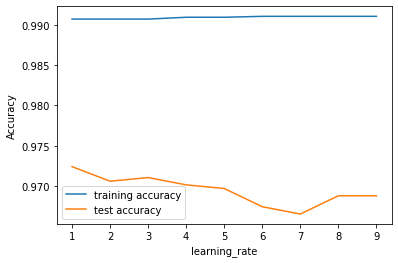

In [61]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [62]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [63]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

[01:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [65]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.987
XGBoost Classifier : Accuracy on test Data: 0.969

XGBoost Classifier : f1_score on training Data: 0.988
XGBoost Classifier : f1_score on test Data: 0.973

XGBoost Classifier : Recall on training Data: 0.993
XGBoost Classifier : Recall on test Data: 0.993

XGBoost Classifier : precision on training Data: 0.984
XGBoost Classifier : precision on test Data: 0.984


In [66]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [67]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [68]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [69]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multilayer Perceptron : Accuracy on training Data: 0.986
Multilayer Perceptron : Accuracy on test Data: 0.969

Multilayer Perceptron : f1_score on training Data: 0.988
Multilayer Perceptron : f1_score on test Data: 0.988

Multilayer Perceptron : Recall on training Data: 0.995
Multilayer Perceptron : Recall on test Data: 0.989

Multilayer Perceptron : precision on training Data: 0.981
Multilayer Perceptron : precision on test Data: 0.958


In [70]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [71]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [72]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.960,0.964,0.991,0.993
5,Random Forest,0.967,0.971,0.993,0.990
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,XGBoost Classifier,0.969,0.973,0.993,0.984
9,Multi-layer Perceptron,0.969,0.973,0.995,0.981


In [73]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [74]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,XGBoost Classifier,0.969,0.973,0.993,0.984
3,Multi-layer Perceptron,0.969,0.973,0.995,0.981
4,Random Forest,0.967,0.971,0.993,0.990
5,Support Vector Machine,0.964,0.968,0.980,0.965
6,Decision Tree,0.960,0.964,0.991,0.993
7,K-Nearest Neighbors,0.956,0.961,0.991,0.989
8,Logistic Regression,0.934,0.941,0.943,0.927
9,Naive Bayes Classifier,0.605,0.454,0.292,0.997


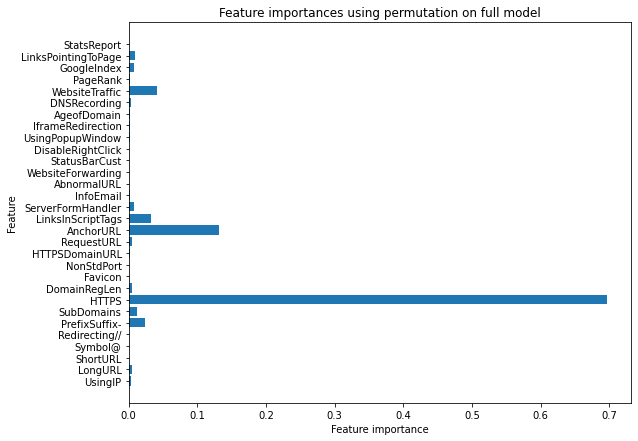

In [75]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
